# 6. Complex derivatives

We have studied functions that take real inputs and give complex outputs (e.g., complex solutions to the [damped harmonic oscillator](04_complex_oscillations.ipynb), which are complex functions of time).  For such functions, the [derivative](01_derivatives.ipynb) with respect to its real input is much like the derivative of a real function of real inputs.  It is equivalent to taking the derivative of the real and imaginary parts, separately:

$$\frac{d\psi}{dx} = \frac{d\mathrm{Re}(\psi)}{dx} + i \frac{d\mathrm{Im}(\psi)}{dx}.$$

Now consider the more complicated case of a function of a *complex* variable:

$$f(z) \in \mathbb{C}, \;\;\mathrm{where}\;\; z \in \mathbb{C}.$$

At one level, we could just treat this as a function of two independent real inputs: $f(x,y)$, where $z = x + i y$. However, in doing so we would be disregarding the mathematical structure of the complex input&mdash;the fact that $z$ is not just a mere collection of two real numbers, but a complex *number* that can be subjected to algebraic operations.  This structure has far-reaching consequences for the differential calculus of complex functions.

## Complex continuity and differentiability

The concept of a **continuous complex function** makes use of an "epsilon-delta definition", similar to the [definition of continuity for functions of real variables](00_mathfunctions.ipynb#continuity).  A complex function $f(z)$ is continuous at $z_0 \in \mathbb{C}$ if, for any $\epsilon > 0$, we can find a $\delta > 0$ such that

$$\big|\, z - z_0 \,\big| < \delta \;\;\; \Rightarrow \;\;\; \big|\, f(z) - f(z_0) \,\big| < \epsilon.$$

In this definition, $\big|\cdots\big|$ indicates the [magnitude of a complex number](03_complex_numbers.ipynb#magnitude).  What this definition basically means is that as we vary $z$ smoothly, there should be no abrupt jumps in the value of $f(z)$.

If a function is continuous at a point $z$, we then can define its **complex derivative** as

$$f'(z) = \lim_{\delta z\rightarrow 0} \frac{f(z+\delta z) - f(z)}{\delta z}.$$

This is very similar to the [definition of the derivative](01_derivatives.ipynb) for a function of a real variable.  However, there's a complication which doesn't appear in the real case: the infinitesimal $\delta z$ is a complex number, not just a real number.  The above definition does not specify the [argument](03_complex_numbers.ipynb#polar) of the  complex number. The choice of the argument of $\delta z$ is equivalent to the direction in the complex plane in which $\delta z$ points, as shown in the following figure:

<img src="img/complex_derivative.png" alt="Choice of delta z." width=30%>

In principle, we might get different results from the above formula when we plug in different infinitesimals $\delta z$, even in the limit where $\delta z \rightarrow 0$ and even though $f(z)$ is continuous.

<a name="example2"></a>
<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>Consider the function $f(z) = z^*$.  According to the formula for the complex derivative,<br/>$$\lim_{\delta z \rightarrow0} \frac{f(z+\delta z) - f(z)}{\delta z} = \lim_{\delta z \rightarrow0} \frac{z^*+\delta z^* - z^*}{\delta z} = \lim_{\delta z \rightarrow0} \frac{\delta z^*}{\delta z}.$$<br/>But if we plug in a real $\delta z$, we get a different result than if we plug in an imaginary $\delta z$:<br/>$$\begin{aligned}\delta z \in \mathbb{R} \;\; &\Rightarrow \frac{\delta z^*}{\delta z} = 1.\\ \delta z \in i \cdot \mathbb{R} &\Rightarrow \frac{\delta z^*}{\delta z} = -1.\end{aligned}$$</td></tr></table>

To cope with this complication, we regard the complex derivative as well-defined *only if* the above definition gives the same answer regardless of the argument of $\delta z$. If a function $f(z)$ satisfies this property at a point $z$, then we say that the function is **complex-differentiable** at $z$. In other words, a complex-differentiable function is one possessing an unambiguous complex derivative.

As we have seen in the preceding example, $f(z) = z^*$ is not complex-differentiable for any $z \in \mathbb{C}$.  On the other hand, the following example shows that the function $f(z) = z$ is complex-differentiable for all $z \in \mathbb{C}$:

<a name="example2"></a>
<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>The function $f(z) = z$ is complex differentiable for any $z \in \mathbb{C}$. To prove this:<br/>$$\lim_{\delta z \rightarrow0} \frac{f(z+\delta z) - f(z)}{\delta z} = \lim_{\delta z \rightarrow0} \frac{z+\delta z - z}{\delta z} = \lim_{\delta z \rightarrow0} \frac{\delta z}{\delta z} = 1.$$<br/>Notice why this result doesn't depend on the argument of the complex infinitesimal $\delta z$: when the function is plugged into the derivative formula and then simplified, it ends up as the fraction $\delta z / \delta z$, which is equal to 1 even as we take the limit $\delta z \rightarrow 0$ along any direction.</td></tr></table>


## Analytic functions<a name="analytic"></a>

If a function $f(z)$ is complex-differentiable for all points $z$ in some domain $D\subset \mathbb{C}$, then $f(z)$ is said to be **analytic** in $D$ . The concepts of analyticity and complex-differentiability are closely-related. It's mainly a matter of terminology: we speak of a function being complex-differentiable *at a given point*, whereas we speak of a function being analytic *in a given domain*.

<a name="example2"></a>
<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>As shown in the preceding section, $f(z) = z$ is complex-differentiable for any point $z \in \mathbb{C}$.  Thence, $f(z) = z$ is analytic in $\mathbb{C}$.</td></tr></table>

A function's domain of analyticity is usually described spatially, in terms of parts of the [complex plane](03_complex_numbers.ipynb#complex_plane).  For example, a function might be analytic "everywhere in the complex plane", which means the entire domain $\mathbb{C}$.  Or a function might be analytic "in the upper half of the complex plane", meaning for all $z$ such that $\mathrm{Im}(z) > 0$.  Or a function might be analytic "everywhere except at the point $z = 0$".  And so forth.

### Common analytic functions<a name="common_analytic"></a>

Analyticity can be a pretty restrictive condition; for example, we have been that $f(z) = z^*$ is not analytic anywhere in $\mathbb{C}$. However, there is a class of functions which are analytic over the entire complex plane, except possibly for a discrete set of points.  These are functions generated from formulas which involve $z$ in some "simple" combination of algebra operations (addition, multiplication, and integer powers), and which do not involve $z^*$.

For example, we have seen that the function $f(z) = z$ is analytic in $\mathbb{C}$.  Likewise, $f(z) = \alpha z + \beta$, where $\alpha, \beta$ are complex constants, is analytic everywhere in $\mathbb{C}$. This can be proven in a similar fashion:

$$\begin{align}f'(z) &= \lim_{\delta z\rightarrow 0} \frac{[\alpha\,(z+\delta z) + \beta] - [\alpha z + \beta]}{\delta z} \\&= \lim_{\delta z\rightarrow 0} \frac{\alpha \delta z}{\delta z} \\&= \alpha.\end{align}$$

We can also show that $f(z) = z^n$, with $n \in \mathbb{N}$, is analytic everywhere in $\mathbb{C}$:

$$\begin{aligned}f'(z) &= \lim_{\delta z\rightarrow 0} \frac{(z+\delta z)^n - z^n}{\delta z} \\&=
\lim_{\delta z\rightarrow 0} \frac{(z^n + n z^{n-1} \delta z + \cdots) - z^n}{\delta z} \\&= n z^{n-1}.\end{aligned}$$

Note that these derivatives have exactly the same algebraic formulas as the corresponding real derivatives. This is no coincidence: to derive the complex derivatives, we take the same series of algebra steps used for deriving the real derivatives.

From the discussion so far, it is evident that complex polynomials are analytic everywhere in $\mathbb{C}$. Functions that are defined in terms of power series, including the [complex exponential function](03_complex_numbers.ipynb#euler_formula) and [complex sine and cosine functions](03_complex_numbers.ipynb#complex_sin_cos), are likewise analytic everywhere in $\mathbb{C}$.

Functions involving reciprocals (negative integer powers), such as $f(z) = z^{-1}$ or $f(z) = z^{-2}$, are analytic everywhere *except* at points where $f(z)$ becomes singular (i.e., the denominator goes to zero). (We will prove this [later](#using_cauchy_riemann), by using the [Cauchy-Riemann equations](#cauchy_riemann).) More generally, whenever a function involves $z$ in some combination of integer polynomials, reciprocals, or functions with power series expansions&mdash;and does not involve $z^*$ in some irreducible way&mdash;then the function is analytic everywhere except at the singular points.  Moreover, the formula for the complex derivative is the same as the corresponding formula for real derivatives.

<a name="example2"></a>
<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>The function<br/>$$f(z) = \frac{1}{\cos(z)}$$<br/>is analytic everywhere in $\mathbb{C}$, except for values of $z$ such that $\cos(z) = 0$. With a bit of work (try it!), one can show that these $z$ occur at isolated points along the real line, at $z = (m+1/2)\pi$ where $m \in \mathbb{Z}$, and nowhere else in the complex plane. The complex derivative is<br/>$$f'(z) = \frac{\sin(z)}{[\cos(z)]^2}.$$<br/>The easiest way to prove these statements is to use the [Cauchy-Riemann equations](#cauchy_riemann), which are discussed below.</td></tr></table>

Two provisos should be kept in mind:

* For non-integer powers, $z^a$ where $a\notin \mathbb{Z}$, the situation is more complicated because the operation is multi-valued. We'll postpone the discussion of these special operations until the discussion on [branch points and branch cuts](07_branch_cuts.ipynb).
* Even though simple algebraic combinations of $z$ are analytic, the reverse is not necessarily true: i.e., not all analytic functions are given by simple algebraic expressions within their domain.  One counter-example is the [gamma function](gamma_function.ipynb).

### Numerical example of an analytic function

The following plot shows a numerical example of the complex derivative of the function $f(z) = \sin(z)$, which is analytic everywhere in $\mathbb{C}$.

The numerical value of $\delta f/\delta z = \big[\sin(z + \delta z) - \sin(z)\big]/\delta z$ is shown in the plot title.  You are free to vary $\mathrm{Re}(z)$ and $\mathrm{Im}(z)$, as well as the magntidue and argument of the displacement, $\big|\delta z\big|$ and $\mathrm{arg}(\delta z)$. For large values of $\big|\delta z\big|$, you will find that $\delta f/\delta z$ varies with $\mathrm{arg}(\delta z)$.  But when $|\delta z|$ is sufficiently small, $\delta f/\delta z$ approaches a value independent of $\mathrm{arg}(\delta z)$; this is the limiting value of the complex derivative $df/dz = cos(z)$.

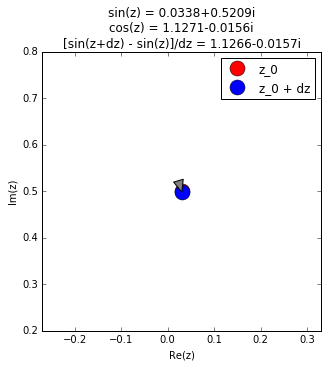

In [1]:
%matplotlib inline
from ipywidgets import interact, FloatSlider
from numpy import linspace, sin, cos, exp, pi
import matplotlib.pyplot as plt

def plot_sinz_derivative(rez, imz, argdz, absdz):
    
    z0 = rez + 1j * imz
    dz = absdz * exp(1j*argdz)
    z1 = z0 + dz

    ## (Plot the circular arc that the points lie on.)
    phi = linspace(-pi, pi, 50)
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(rez + absdz*cos(phi), imz+absdz*sin(phi), color="grey")
    ax.annotate('', xytext=(z0.real, z0.imag), textcoords='data',
                xy=(z1.real, z1.imag), xycoords='data',
                arrowprops={'facecolor':'grey','headwidth':10,'width':2})
    plt.plot(z0.real, z0.imag, 'o', color="red", markersize=15, label="z_0")
    plt.plot(z1.real, z1.imag, 'o', color="blue", markersize=15, label="z_0 + dz")
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')

    ## Calculate the derivative and report it.
    sinz0, cosz0 = sin(z0), cos(z0)
    dfdz  = (sin(z1) - sinz0)/dz
    plt.title('sin(z) = {:.4f}{:+.4f}i\n\
cos(z) = {:.4f}{:+.4f}i\n\
[sin(z+dz) - sin(z)]/dz = {:.4f}{:+.4f}i'.format(sinz0.real, sinz0.imag, cosz0.real, cosz0.imag, dfdz.real, dfdz.imag))
    
    plt.xlim(rez-0.3, rez+0.3)
    plt.ylim(imz-0.3, imz+0.3)
    plt.axes().set_aspect('equal')
    ax.legend(numpoints=1, loc='best')

interact(plot_sinz_derivative,
         rez   = FloatSlider(min=-1.5, max=1.50, step=0.01, value=1.0),
         imz   = FloatSlider(min=-1.5, max=1.50, step=0.01, value=0.5),
         argdz = FloatSlider(min=0.00, max=6.28, step=0.01, value=0.0),
         absdz = FloatSlider(min=0.002, max=0.20, step=0.002, value=0.2));

## Cauchy-Riemann equations<a name="cauchy_riemann"></a>

The **Cauchy-Riemann equations** are a pair of real [partial differential equations](01_derivatives.ipynb#PDE) that provide an alternative way to define the concept of a complex derivative. Let $f(z)$ be a complex function.  We can write $f$ as the sum of real and imaginary parts,

$$f(x + iy) = u(x,y) + i v(x,y),$$

where $u(x,y)$ and $v(x,y)$ are real functions of two real inputs.  The Cauchy-Riemann equations are:

$$\frac{\partial u}{\partial x} = \frac{\partial v}{\partial y},\;\; \frac{\partial u}{\partial y} = -\frac{\partial v}{\partial x}.$$

These equations are important for the following reason: ***a function is complex-differentiable at a point $z = x + i y$ if and only if the Cauchy-Riemann equations are well-defined and satisfied at $(x,y)$***.  Here, "well-defined" means that the functions $u(x,y)$ and $v(x,y)$ are [real-differentiable](01_derivatives.ipynb), in both $x$ and $y$ directions, at the given point, so that their partial derivatives are well-defined.

### Proof

We will now prove the first part of the preceding "if and only if" statement, which states that if a function is complex-differentiable, then the Cauchy-Riemann equations are well-defined and satisfied.  The proof of the converse is left as an [exercise](#exercises).

Suppose the function $f$ is complex-differentiable at some point $z$.  Following from the definition of complex differentiability, if we make an infinitesimal displacement away from $z$ by an amount $\delta z$, the value of the function changes by

$$\begin{aligned}\delta f &= f(z + \delta z) - f(z) \\&= f'(z)\, \delta z + O(\delta z^2).\end{aligned}$$

Here, $O(\delta z^2)$ denotes a term that is quadratic or high-order in $\delta z$, and becomes negligible compared to the first term, as $\delta z \rightarrow 0$.  As part of the definition of complex differentiability, $f'(z)$ is independent of the argument (or "direction") of $\delta z$.

Let us study the effects of displacing along two different directions: specifically, the real and imaginary directions.  First, we displace along the real direction by taking $\delta z = \delta x \in \mathbb{R}$.  Let us denote the resulting change in the value of the function by $(\delta f)_1$.  Based on the previous equation,

$$(\delta f)_1 = f'(z) \, \delta x + O(\delta x^2).$$

On the other hand, $\delta f$ can also be written in terms of the change in the real and imaginary component functions $u(x,y)$ and $v(x,y)$.  According to the usual definition of partial derivatives, the change resulting from a displacement in $x$ is

$$\begin{align}(\delta f)_1 &= (\delta u)_1 + i (\delta v)_1 \\&= \left[\frac{\partial u}{\partial x}\; \delta x + O(\delta x^2)\right] + i \left[\frac{\partial v}{\partial x} \;\delta x+ O(\delta x^2)\right] \\&= \left[\frac{\partial u}{\partial x} + i \frac{\partial v}{\partial x}\right] \,\delta x\, +\, O(\delta x^2).\end{align}$$

Comparing this with the preceding equation gives

$$\mathrm{Re}\left[f'(z)\right] = \frac{\partial u}{\partial x},\;\;\;\mathrm{Im}\left[f'(z)\right] = \frac{\partial v}{\partial x}. \qquad\qquad\;\;\;(1)$$

Secondly, let us displace along the imaginary direction by taking $\delta z = i \delta y$, where $\delta y \in \mathbb{R}$.  In this case, the resulting change in the value of the function is $(\delta f)_2$, given by

$$(\delta f)_2 = f'(z) \;i\, \delta y.$$

In terms of the component functions,

$$\begin{align}(\delta f)_2 &= (\delta u)_2 + i (\delta v)_2 \\&= \left[\frac{\partial u}{\partial y}\; \delta y + O(\delta y^2)\right] + i \left[\frac{\partial v}{\partial y} \;\delta y+ O(\delta y^2)\right] \\&= \left[\frac{\partial u}{\partial y} + i \frac{\partial v}{\partial y}\right] \,\delta y\, +\, O(\delta y^2).\end{align}$$

Hence,

$$\mathrm{Re}\left[f'(z)\right] = \frac{\partial v}{\partial y},\;\;\;\mathrm{Im}\left[f'(z)\right] = -\frac{\partial u}{\partial y}.\qquad\qquad(2)$$

Combining the two sets of results, (1) and (2), we arrive at the Cauchy-Riemann equations.  As a corollary, this gives us a set of convenient expressions for the complex derivative of $f(z)$:

$$\begin{aligned}\mathrm{Re}\left[f'(z)\right] &= \frac{\partial u}{\partial x} = \frac{\partial v}{\partial y} \\ \mathrm{Im}\left[f'(z)\right] &= \frac{\partial v}{\partial x} = -\frac{\partial u}{\partial y}.\end{aligned}$$

### Interpretation of the Cauchy-Riemann equations

The central message of the Cauchy-Riemann equations is that when dealing with analytic functions, the real and imaginary parts of complex numbers cannot be regarded as independent quantities, but are closely intertwined.  There are two complementary ways to think about this:

* For an analytic function $f(z)$, the real and imaginary parts of the input $z$ do not independently affect the output value.  If I tell you how the function varies in the $x$ direction, by giving you $\partial u/\partial x$ and $\partial v/\partial x$, then you can work out how the function varies in the $y$ direction, by using the Cauchy-Riemann equations to find $\partial u/\partial y$ and $\partial v/\partial y$.
* Similarly, for the complex outputs of $f(z)$, the real and imaginary parts cannot be regarded as independent.  If I tell you how the real part of the output varies, by giving you $\partial u/\partial x$ and $\partial u/\partial y$, then you can work out how the imaginary part of the output varies, by using the Cauchy-Riemann equations to find $\partial v/\partial x$ and $\partial v/\partial y$.

These constraints have profound implications for the mathematical discipline of complex analysis, one of the most important being Cauchy's integral theorem, which we will encounter when studying [contour integration](08_contour_integration.ipynb).

### Consequences of the Cauchy-Riemann equations<a name="using_cauchy_riemann"></a>

The Cauchy-Riemann equations are a useful tool for showing that a function is analytic in a given domain.  They are often more convenient to use than the first-principles definition of complex differentiability, because it lets you avoid dealing with limiting expressions.

<a name="example2"></a>
<table width=75%>
<tr><td>**Example**</td></tr>
<tr><td>We can use the Cauchy-Riemann equations to prove that the function<br/>$$f(z)=1/z$$</br>is analytic everywhere, except at $z = 0$.  Let us write the function as<br/>$$f(x+iy) = \frac{1}{x+iy} = \frac{x-iy}{x^2+y^2}.$$<br/>Hence the real and imaginary component functions are<br/>$$u(x,y) = \frac{x}{x^2+y^2}, \;\;v(x,y) = - \frac{y}{x^2+y^2}.$$<br/>Except at the point $x = y = 0$, these functions are differentiable, and their partial derivatives satisfy:<br/>$$\begin{aligned}\frac{\partial u}{\partial x} &= \frac{-x^2+y^2}{(x^2+y^2)^2}\!\!\!\!\!\! &=& \;\;\;\frac{\partial v}{\partial y} \\ \frac{\partial v}{\partial x} &= \; \frac{2xy}{x^2+y^2} &=& -\frac{\partial u}{\partial y}.\end{aligned}$$</td></tr></table>

More generally, we can use the Cauchy-Riemann equations to prove the following facts about analytic functions:

* *Compositions of analytic functions are analytic*.  If $f(z)$ is analytic in $D \subset \mathbb{C}$ and $g(z)$ is analytic in the range of $f$, then $g(f(z))$ is analytic in $D$.
* *Reciprocals of analytic functions are analytic, except at singularities*. If $f(z)$ is analytic in $D \subset \mathbb{C}$, then $1/f(z)$ is analytic everywhere in $D$ except where $f(z) = 0$.

The proofs for these can be obtained by direct substitution into the Cauchy-Riemann equations, and are left as [exercises](#exercises).

## Exercises<a name="exercises"></a>

<ol>
<li>For each of the following functions $f(z)$, find the real and imaginary component functions $u(x,y)$ and $v(x,y)$, and hence verify whether they satisfy the Cauchy-Riemann equations.<ol style="list-style-type:lower-alpha"> <li>&nbsp;$f(z) = z$</li> <li>&nbsp;$f(z) = z^2$</li>  <li>&nbsp;$f(z) = |z|$</li> <li>&nbsp;$f(z) = |z|^2$</li>  <li>&nbsp;$f(z) = \exp(z)$</li> <li>&nbsp;$f(z) = \cos(z)$</li> <li>&nbsp;$f(z) = 1/z$</li></ol>
</li>
<li>Suppose a function $f(z)$ is well-defined and obeys the Cauchy-Riemann equations at a point $z$, and the partial derivatives in the Cauchy-Riemann equations are continuous at that point.  Show that the function is complex differentiable at that point.  Hint: consider an arbitary displacement $\Delta z = \Delta x + i \Delta y$.</li>
<li>Prove that products of analytic functions are analytic: if $f(z)$ and $g(z)$ are analytic in $D \subset \mathbb{C}$, then $f(z) g(z)$ is analytic in $D$.</li>
<li>Prove that compositions of analytic functions are analytic: if $f(z)$ is analytic in $D \subset \mathbb{C}$ and $g(z)$ is analytic in the range of $f$, then $g(f(z))$ is analytic in $D$.</li>
<li>Prove that reciprocals of analytic functions are analytic away from poles: if $f(z)$ is analytic in $D \subset \mathbb{C}$, then $1/f(z)$ is analytic everywhere in $D$ except where $f(z) = 0$.</li>
<li>Show that if $f(z = x + iy) = u(x,y) + i v(x,y)$ satisfies the Cauchy-Riemann equations, then the real functions $u$ and $v$ each obey Laplace's equation:<br/>$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2u}{\partial x^2} = \frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial x^2} = 0.$$<br/>(Such functions are called "harmonic functions".)</li>
<li>We can write the real and imaginary parts of a function in terms of polar coordinates: $f(z) = u(r,\theta) + i v(r,\theta)$, where $z = re^{i\theta}$. Using the formula for [how partial derivatives transform under a change of variables](01_derivatives.ipynb#change_of_variables), show that the Cauchy-Riemann equations can be re-written in polar form as<br/>$$\frac{\partial u}{\partial r} =  \frac{1}{r} \frac{\partial v}{\partial \theta}, \quad \frac{\partial v}{\partial r} =  - \frac{1}{r}\,  \frac{\partial u}{\partial \theta}.$$</li>
</ol>